In [ ]:
# 3-2
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving img1.png to img1.png
Saving img2.png to img2.png
Saving img4.png to img4.png


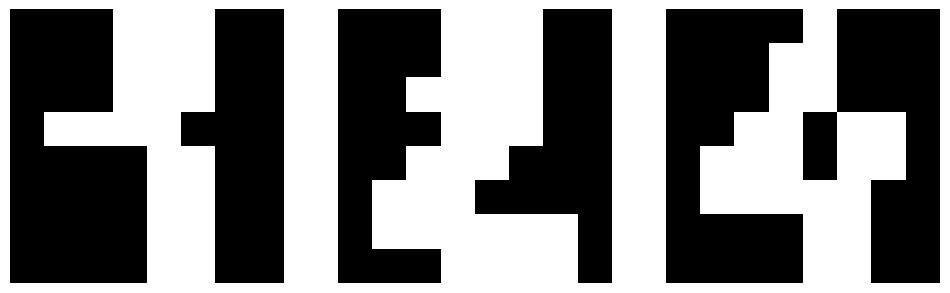

In [ ]:
import cv2
import matplotlib.pyplot as plt
# 업로드한 이미지 경로
image_path_1 = list(uploaded.keys())[0]
image_path_2 = list(uploaded.keys())[1]
image_path_4 = list(uploaded.keys())[2]

# 이미지 전처리
img1 = cv2.imread(image_path_1)
img2 = cv2.imread(image_path_2)
img4 = cv2.imread(image_path_4)

# 흑백 변환
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

 # 크기 조정
img1 = cv2.resize(img1, (8, 8))
img2 = cv2.resize(img2, (8, 8))
img4 = cv2.resize(img4, (8, 8))

# 정규화
img1 = img1 / 255.0
img2 = img2 / 255.0
img4 = img4 / 255.0

# 이미지를 1차원 배열로 변환
img1 = img1.reshape(1, -1)
img2 = img2.reshape(1, -1)
img4 = img4.reshape(1, -1)

img_list = [img1, img2, img4]

plt.figure(figsize=(12, 4))
for i in range(len(img_list)):
    plt.subplot(1, len(img_list), i + 1)  # 1행 len(img_list)열의 subplot 생성
    plt.imshow(img_list[i].reshape(8, 8), cmap='gray')  # 이미지 출력
    plt.axis('off')  # 이미지 축 제거
plt.show()  # 모든 이미지 출력

In [ ]:
# 훈련과 테스트 데이터세세 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2]:
from sklearn.metrics import accuracy_score

# 모델 예측
predicted_label1 = logisticRegr.predict(img1)
predicted_label2 = logisticRegr.predict(img2)
predicted_label4 = logisticRegr.predict(img4)

# 예측된 레이블 출력
print("First Image Label:", predicted_label1[0])
print("Second Image Label:", predicted_label2[0])
print("Third Image Label:", predicted_label4[0])

# 정확도 계산
predicted_list = [predicted_label1, predicted_label2, predicted_label4]
true_label = [0, 0, 0]

for i in range(3):
  for y_label in y_test:
    if predicted_list[i][0] == y_label: # 예측한 레이블과 실제 레이블이 같은지 확인
      true_label[i] =  y_label          # 같다면 정답 레이블 삽입
      break

# 3장의 이미지를 예측한 레이블과 실제 레이블을 비교하여 정확도 출력
accuracy = accuracy_score(true_label, predicted_list)
print("Accuracy:", accuracy)

NameError: ignored